In [1]:
import numpy as np
import pandas as pd
import os

!dir

 Volume in drive C is Acer
 Volume Serial Number is 6EB4-30B0

 Directory of C:\Users\John Samuel\Desktop\DMT project

06/04/2021  03:12 AM    <DIR>          .
06/04/2021  03:12 AM    <DIR>          ..
06/03/2021  01:44 PM    <DIR>          .ipynb_checkpoints
06/04/2021  03:12 AM            82,264 DL part.ipynb
06/03/2021  08:54 PM           626,939 ML part.ipynb
10/23/2019  01:17 AM            33,145 Website Phishing.csv
               3 File(s)        742,348 bytes
               3 Dir(s)  765,842,006,016 bytes free


In [ ]:
# Single layer perceptron implementation

In [2]:
def calculate_precision(arr):
    precision=[]
    for i in range(len(arr)):
        sumVal=0
        for j in range(len(arr)):
            sumVal+=arr[i][j]
        precision.append(arr[i][i]/sumVal)
    return precision

In [3]:
def calculate_accuracy(arr):
    leading_diagonal=0
    for i in range(0, len(arr)):
        leading_diagonal+=arr[i][i]
    return leading_diagonal/sum(sum(np.array(arr)))

def calculate_recall(arr):
    recall=[]
    for i in range(len(arr)):
        sumVal=0
        for j in range(len(arr)):
            sumVal+=arr[j][i]
        recall.append(arr[i][i]/sumVal)
    return recall

In [9]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.05, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if i > 0 else 0 for i in y])
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [16]:
# Training the model
data = pd.read_csv("./Website Phishing.csv")
data.head(10)
x=data.values.tolist()
training_data=[i[:-1] for i in x]
label_value=[i[-1] for i in x]

testing_data=training_data[int(len(training_data)*.8):]
test_label_value=label_value[int(len(training_data)*.8):]
perceptron_model=Perceptron()
perceptron_model.fit(np.array(training_data), np.array(label_value))

accuracy: 0.8523985239852399
precision:  [0.8515625, 0.8181818181818182, 0.859504132231405]
recall:  [0.9646017699115044, 0.5142857142857142, 0.8455284552845529]


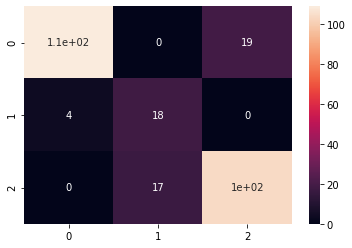

In [22]:
# Prediction
import seaborn as sns
import random as r
from sklearn.metrics import confusion_matrix
perceptron_predictions= perceptron_model.predict(testing_data)
        
c=confusion_matrix(test_label_value, perceptron_predictions)
sns.heatmap(c, annot=True)

perceptron_accuracy=calculate_accuracy(c)
perceptron_precision=calculate_precision(c)
perceptron_recall=calculate_recall(c)

print("accuracy:", perceptron_accuracy)
print("precision: ", perceptron_precision)
print("recall: ", perceptron_recall)

In [23]:
# multilayer perceptron with backpropagation
from sklearn.neural_network import MLPClassifier
X = [i[:-1] for i in x]
y = [i[-1] for i in x]
clf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(15,7), random_state=1, max_iter=4000)
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 7), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=4000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

accuracy: 0.9600886917960089
precision:  [0.9643874643874644, 1.0, 0.9470802919708029]
recall:  [0.9671428571428572, 0.8879310344827587, 0.9664804469273743]


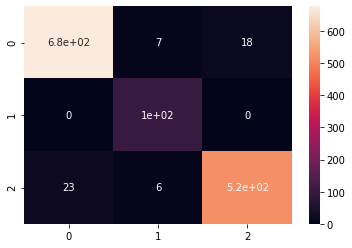

In [24]:
# multilayer perceptron prediction
X=[i[:-1] for i in x]
multilayer_perceptron_results=[]
for i in range(len(training_data)):
    res=clf.predict([X[i]])
    multilayer_perceptron_results.append(res[0])
   
c=confusion_matrix(label_value, multilayer_perceptron_results)
sns.heatmap(c, annot=True)

multilayer_perceptron_accuracy=calculate_accuracy(c)
multilayer_perceptron_precision=calculate_precision(c)
multilayer_perceptron_recall=calculate_recall(c)

print("accuracy:", multilayer_perceptron_accuracy)
print("precision: ", multilayer_perceptron_precision)
print("recall: ", multilayer_perceptron_recall)

In [ ]:
# ADALINE

In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

adl = make_pipeline(StandardScaler(),SGDClassifier(max_iter=10000, tol=1e-6))
adl.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=10000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=1e-06, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

accuracy: 0.8240946045824095
precision:  [0.8646723646723646, 0.05825242718446602, 0.916058394160584]
recall:  [0.883551673944687, 0.2222222222222222, 0.7856025039123631]


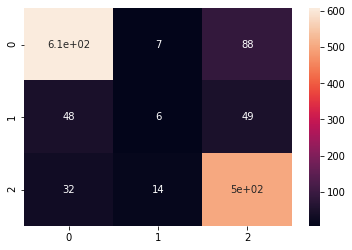

In [37]:
adaline_results=[]
X=[i[:-1] for i in x]
for i in range(len(training_data)):
    res=adl.predict([X[i]])
    adaline_results.append(res[0])

c=confusion_matrix(label_value, adaline_results)
sns.heatmap(c, annot=True)

adaline_accuracy=calculate_accuracy(c)
adaline_precison=calculate_precision(c)
adaline_recall=calculate_recall(c)

print("accuracy:", adaline_accuracy)
print("precision: ", adaline_precison)
print("recall: ", adaline_recall)

In [ ]:
# MLP regressor

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
mlp = MLPregressor(random_state=1, max_iter=100
                   0).fit(training_data, label_value)

accuracy: 0.9563932002956393
precision:  [0.9700854700854701, 0.9902912621359223, 0.9324817518248175]
recall:  [0.9564606741573034, 0.8869565217391304, 0.9714828897338403]


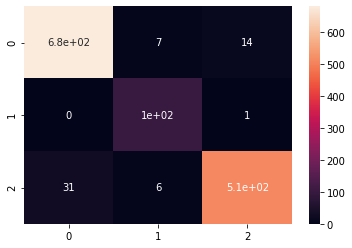

In [39]:
mlp_results=[]
X=[i[:-1] for i in x]
for i in range(len(training_data)):
    res=mlp.predict([X[i]])
    mlp_results.append(res[0])

c=confusion_matrix(label_value, mlp_results)
sns.heatmap(c, annot=True)

mlp_accuracy=calculate_accuracy(c)
mlp_precision=calculate_precision(c)
mlp_recall=calculate_recall(c)

print("accuracy:", mlp_accuracy)
print("precision: ", mlp_precision)
print("recall: ", mlp_recall)

In [40]:
!pip install sklearn-genetic

In [41]:
from __future__ import print_function
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV

In [42]:
estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")
selector = GeneticSelectionCV(estimator,
                              cv=5,
                              verbose=1,
                              scoring="accuracy",
                              max_features=5,
                              n_population=50,
                              crossover_proba=0.5,
                              mutation_proba=0.2,
                              n_generations=40,
                              crossover_independent_proba=0.5,
                              mutation_independent_proba=0.05,
                              tournament_size=3,
                              n_gen_no_change=10,
                              caching=True,
                              n_jobs=-1)
selector = selector.fit(training_data, label_value)

Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                    
0  	50    	[0.69993817 2.76      ]	[0.08325431 1.40797727]	[0.51884652 1.        ]	[0.82856089 5.        ]
1  	26    	[-399.2820433    3.56     ]	[1.95973835e+03 1.34402381e+00]	[-1.e+04  1.e+00]      	[0.82929343 7.        ]
2  	36    	[-799.2848205    3.82     ]	[2.71314289e+03 1.35188757e+00]	[-1.e+04  1.e+00]      	[0.82929343 6.        ]
3  	28    	[-599.24597059    4.1       ]	[2.37505892e+03 1.18743421e+00]	[-1.e+04  2.e+00]      	[0.83077217 7.        ]
4  	34    	[-199.20411945    4.42      ]	[1.4001137e+03 9.4000000e-01]  	[-1.e+04  2.e+00]      	[0.83077217 6.        ]
5  	33    	[-799.24122023    4.96      ]	[2.71315575e+03 5.64269439e-01]	[-1.e+04  3.e+00]      	[0.83594369 7.        ]
6  	27    	[-1199.27173044     4.98      ]	[3.24988429e+03 6.16116872e-01]	[-1.e+04  3.e+00]      	[0.83594369 7.        ]
7  	38    	[-599.22

accuracy: 0.8329637841832964
precision:  0.8329637841832964
recall:  0.8329637841832964


C:\Users\JohnConda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


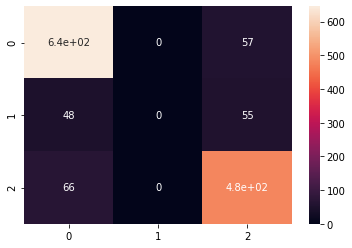

In [44]:
genetic_algorithm=[]
X=[i[:-1] for i in x]
for i in range(len(training_data)):
    res=selector.predict([X[i]])
    genetic_algorithm.append(res[0])

c=confusion_matrix(label_value, genetic_algorithm)
sns.heatmap(c, annot=True)

genetic_algorithm_accuracy=calculate_accuracy(c)
genetic_algorithm_precision=calculate_precision(c)
genetic_algorithm_recall=calculate_recall(c)

print("accuracy:", genetic_algorithm_accuracy)
print("precision: ", genetic_algorithm_accuracy)
print("recall: ", genetic_algorithm_accuracy)

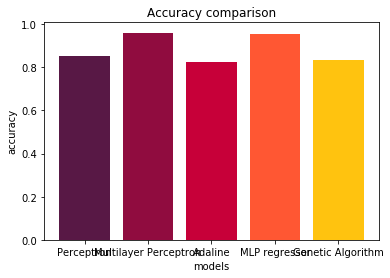

In [53]:
# accuracy histogram
import matplotlib.pyplot as plt
xAxis = [perceptron_accuracy, multilayer_perceptron_accuracy, adaline_accuracy, mlp_accuracy, genetic_algorithm_accuracy]
yAxis= [1,2,3,4,5]
left = [1, 2, 3, 4, 5]
height = xAxis

tick_label = ['Perceptron', 'Multilayer Perceptron', 'Adaline', 'MLP regressor', 'Genetic Algorithm']
plt.bar(left, height, tick_label = tick_label, width = 0.8, color = ['#581845', '#900c3f', '#c70039', '#ff5733', '#ffc30f' ])
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('Accuracy comparison')

plt.show()

In [105]:
import pickle
filename = 'MLP_Regressor_Model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [106]:
filename="Multilayer_Perceptron_Model.sav"
pickle.dump(mlp, open(filename, 'wb'))